In [1]:
import pyeffort
import numpy as np
import copy
import matplotlib.pyplot as plt
import corner
from scipy.stats import uniform, norm

# import pocoMC
import pocomc as pc
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, loadMCSamples, MCSamples
import getdist
import matplotlib.pyplot as plt
import IPython

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
nk = 49
x = np.linspace(0.02,0.5,nk)
k_grid = np.zeros(nk-1)
for i in range(0, nk-1):
    k_grid[i] = (x[i]+x[i+1])/2
len(k_grid)
k_grid

array([0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085, 0.095, 0.105,
       0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175, 0.185, 0.195,
       0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265, 0.275, 0.285,
       0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355, 0.365, 0.375,
       0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445, 0.455, 0.465,
       0.475, 0.485, 0.495])

In [3]:
sky = 0
folder = "trained_hanyu_10000/"

In [4]:
z_idx = 0
if z_idx == 0:
    print("You choose z = 0.5!")
elif z_idx == 1:
    print("You choose z = 0.8!")
elif z_idx == 2:
    print("You choose z = 1.1!")
elif z_idx == 3:
    print("You choose z = 1.4!")
else:
    print("You didn't select a viable redshift!")

You choose z = 0.5!


In [5]:
Mono_Emu = pyeffort.load_multipole(0, folder, k_grid, 0)
Quad_Emu = pyeffort.load_multipole(2, folder, k_grid, 0)

In [6]:
cov = np.load("masked_cov_20.npy")

In [7]:
def theory(theta, n, z, Mono_Emu, Quad_Emu):
    # theta[0:6] cosmoparams, ln_10_As, ns, h, ωb, ωc, Mν
    # theta[6:13] bias
    # theta[13:16] stoch
    h = theta[2]
    omb = theta[3]
    omc = theta[4]
    Mnu = theta[5]
    Omm = (omb+omc+Mnu/93.14)/h**2
    f = pyeffort.compute_fz(z, Omm, -1., 0.);

    my_theta = copy.deepcopy(theta)
    my_theta[10] /= (0.7**2)
    my_theta[11] /= (0.35**2)
    my_theta[12] /= (0.35**2)
    n_bar = 3e-4 #this is the galaxy density, feel free to modify it!
    k_grid = Mono_Emu.P11.kgrid
    stoch_0, stoch_2 = pyeffort.get_stoch_terms(theta[13], theta[14], theta[15], n_bar, k_grid)
    return np.hstack(((pyeffort.compute_Pl(my_theta[0:6], my_theta[6:13],  f, Mono_Emu) + stoch_0)[0:n],
                (pyeffort.compute_Pl(my_theta[0:6], my_theta[6:13], f, Quad_Emu) + stoch_2)[0:n]))


In [8]:
theta = np.array([3.044, 0.965, 0.675, 0.02235, 0.120, 0.06,     1., 1., 1., 1., 1., 1., 1., 1., 1.,1.])
n = 40
z = 0.5
result = theory(theta, n, z, Mono_Emu, Quad_Emu)
#%timeit theory(theta, n, z, Mono_Emu, Quad_Emu)

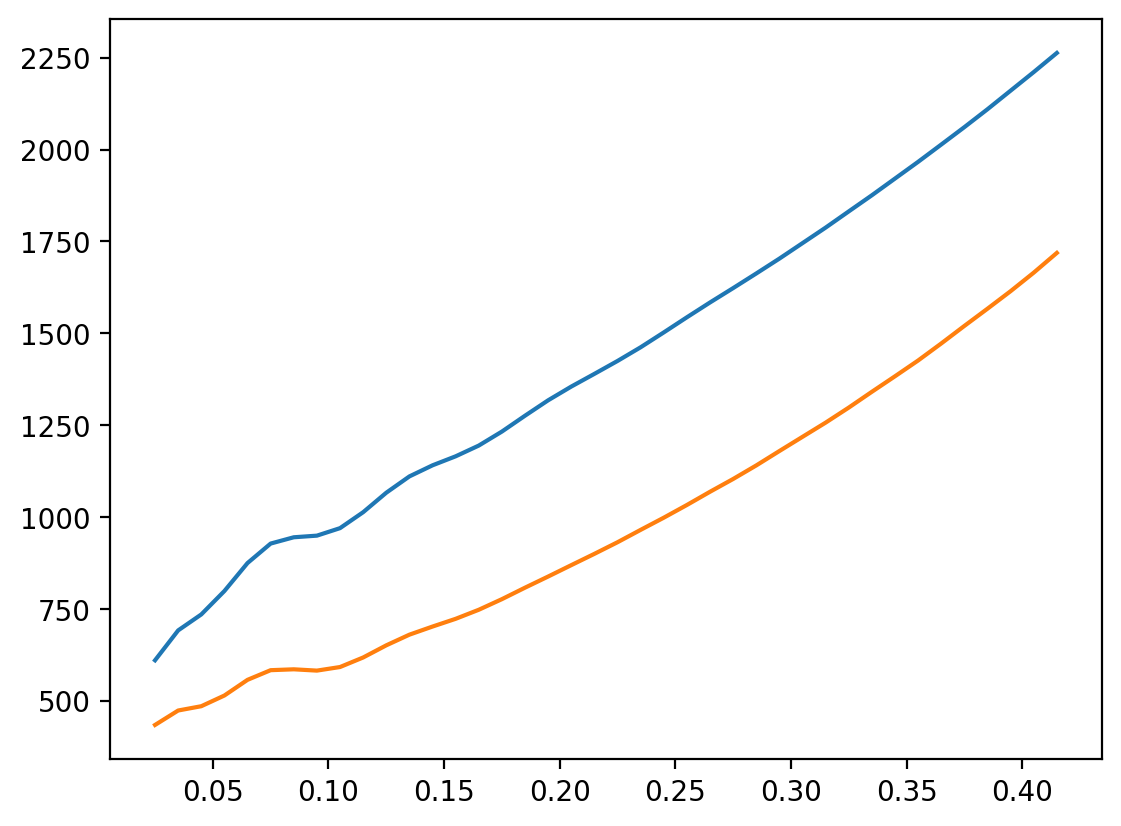

In [9]:
plt.plot(k_grid[0:n], k_grid[0:n] * result[0:n])
plt.plot(k_grid[0:n], k_grid[0:n] * result[n:2*n])

In [10]:
k_grid[0:n] * result[0:n]

array([ 610.02915104,  691.40251928,  734.84885239,  798.56733999,
        874.72263985,  927.7301949 ,  944.85889379,  949.27544936,
        969.69160036, 1013.08321525, 1066.11488517, 1110.50166181,
       1140.67918288, 1165.20616595, 1194.44839107, 1232.5247915 ,
       1275.70966649, 1317.66853618, 1355.00783375, 1389.57480344,
       1424.71183392, 1461.97242197, 1502.37977543, 1543.57741196,
       1583.92674643, 1623.01546699, 1662.81332913, 1703.25223944,
       1745.41872813, 1787.65937765, 1831.78671245, 1875.70298562,
       1921.1993513 , 1966.69206365, 2013.72803028, 2061.09832719,
       2109.8673585 , 2160.45355979, 2211.01085313, 2263.04897208])

In [11]:
k_grid[0:n] * result[n:2*n]

array([ 434.02473848,  473.34926412,  485.03838355,  514.17781455,
        556.83328512,  583.10594985,  585.48234354,  581.93952127,
        591.69236535,  617.63959631,  650.73177532,  679.75148768,
        701.84015735,  722.88522122,  747.5410227 ,  776.39138872,
        807.67098534,  837.99319193,  868.98317892,  899.71825658,
        931.32553131,  965.00248231,  998.11878305, 1032.69515764,
       1068.69900692, 1103.48379057, 1140.36067705, 1179.54272731,
       1218.22644013, 1256.85409048, 1297.78066073, 1340.81243637,
       1383.04631404, 1425.9978487 , 1472.33273645, 1520.09593437,
       1566.95427468, 1614.66463571, 1665.06621844, 1718.84593298])

In [12]:
cov = np.load("masked_cov_20.npy")

In [13]:
prior = pc.Prior([
    uniform(2.5, 3.3), # ln10As
    uniform(0.8, 1.2), # ns
    uniform(0.6, 0.8), # h
    uniform(0.02, 0.025), # omb
    uniform(0.085, 0.2), #omc
    uniform(0., 4.), # b1
    uniform(-4., 4.), #b2
    norm(0.0, 10.0), # b3
    norm(0.0, 2.0),#b4
    norm(0.0, 4.0), #cct
    norm(0.0, 8.0), #cr1
    norm(0.0, 8.0), #cr2
    norm(0.0, 2.0), #ce0
    norm(0.0, 4.0), #ce1
    norm(0.0, 4.0), #ce2
])

In [14]:
def log_likelihood(x):
    theta = np.hstack((x[0:5], [0.06], x[5:]))
    n = 20
    z = 0.5
    result = theory(theta, n, z, Mono_Emu, Quad_Emu)
    return -0.5*(result-data) @ invcov @ (result - data)

In [15]:
data = theory(theta, 20, z, Mono_Emu, Quad_Emu)

In [16]:
invcov = np.linalg.inv(cov)

In [17]:
theta = np.array([3.044, 0.965, 0.675, 0.02235, 0.120, 1., 1., 1., 1., 1., 1., 1., 1., 1.,1.])

In [18]:
%timeit log_likelihood(theta)

116 µs ± 3.08 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [19]:
sampler = pc.Sampler(prior=prior,
                     likelihood=log_likelihood,
                     likelihood_args=[],
                     vectorize=False
                     )

In [ ]:
sampler.run()

Iter: 35it [01:25,  3.47s/it, calls=61500, beta=0.000674, logZ=-9.95, ESS=993, acc=0.286, steps=4, logP=-2.33e+3, eff=1]       /home/marcobonici/miniconda3/lib/python3.11/site-packages/pocomc/scaler.py:269: RuntimeWarning: divide by zero encountered in log
  log_det_J = np.log(np.prod(J, axis=1))
Iter: 40it [01:45,  4.86s/it, calls=70500, beta=0.0024, logZ=-12.1, ESS=993, acc=0.263, steps=7, logP=-1.02e+3, eff=1]      

In [45]:
names  = ["ln10As", "ns", "h", "wb", "wc",   "b1", "b2", "b4_{hN}", "b3_{hN}", "cct_{hN}", "cr1_{hN}", "cr2_{hN}", "ce0_{hN}", "ce1_{hN}", "ce2_{hN}"]
labels  = ["\ln 10^{10}A_s", "n_s", "h", "\omega_b", "\omega_c",   "b1_{hN}", "b2_{hN}", "b4_{hN}", "b3_{hN}", "cct_{hN}", "cr1_{hN}", "cr2_{hN}", "ce0_{hN}", "ce1_{hN}", "ce2_{hN}"]

In [46]:
samples, weights, logl, logp = sampler.posterior()

# Trace plot for the first 4 parameters
samples_std = MCSamples(samples=samples, weights = weights, names = names, labels = labels, label = "Standard Prior")

Removed no burn in


Iter: 20it [19:07, 57.35s/it, calls=193750, beta=3.98e-14, logZ=8.18e+4, ESS=990, acc=0.245, steps=49, logP=1.15e+19, eff=1]


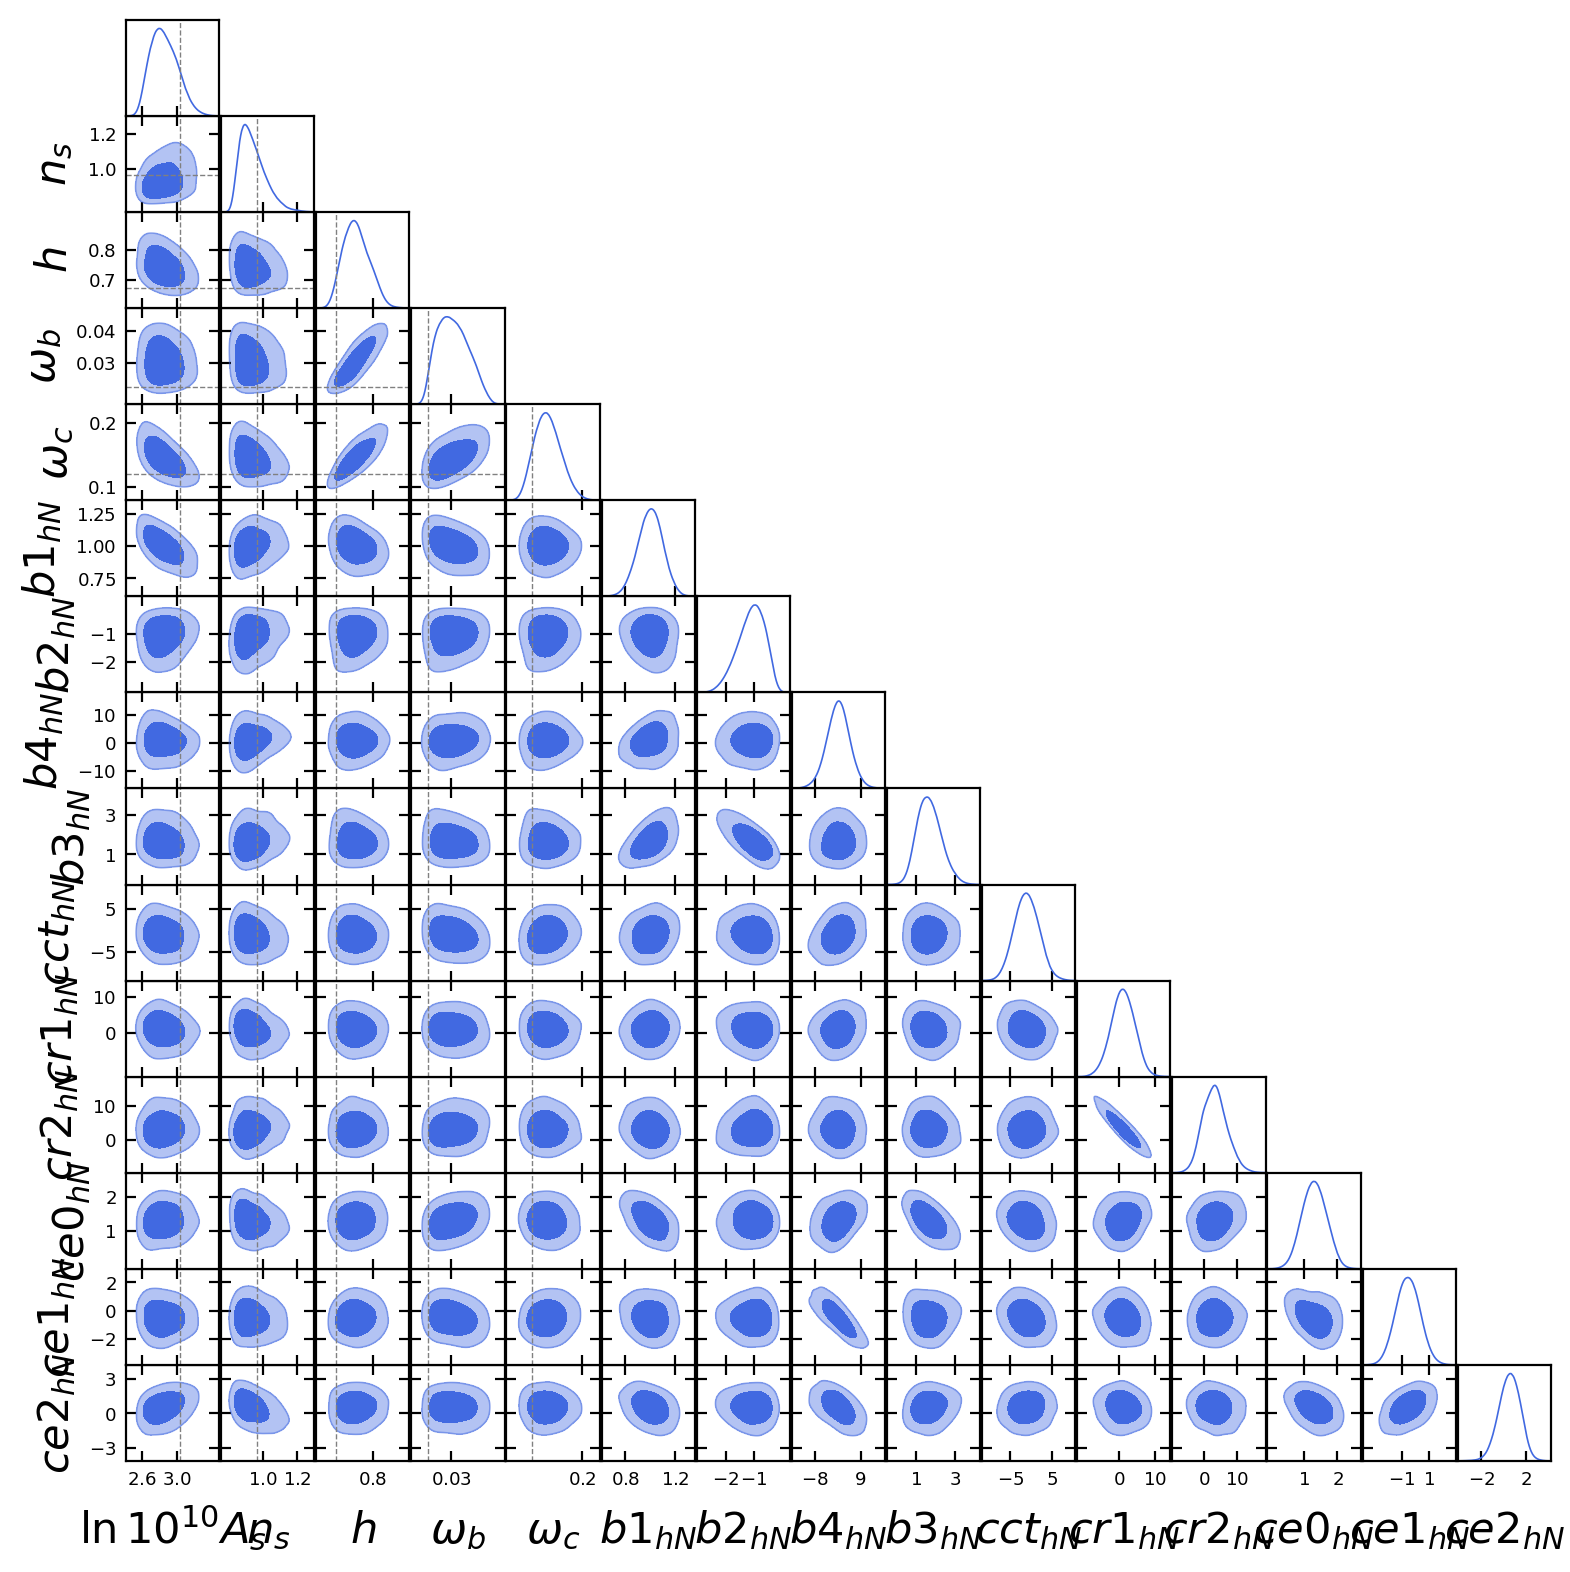

In [48]:
g = plots.get_subplot_plotter(width_inch=8, )
g.settings.scaling_factor = 1.5
g.settings.title_limit_fontsize = 12
g.settings.axes_labelsize = 20
g.settings.legend_fontsize = 28
g.triangle_plot([samples_std,], filled=[True,True], 
                lws=[1,1.5],
                contour_colors=['royalblue','tomato'],
                legend_loc='upper right', 
                # title_limit=1,
                linewidth=4, markers={'ln10As':3.03639,'ns':0.9649,'h':0.6736,'wb':0.02237,'wc':0.12,'b1':2,'b2':1})
plt.savefig("contour_comparison_EFT-HOD_all.pdf")
plt.savefig("contour_comparison_EFT-HOD_all.png")

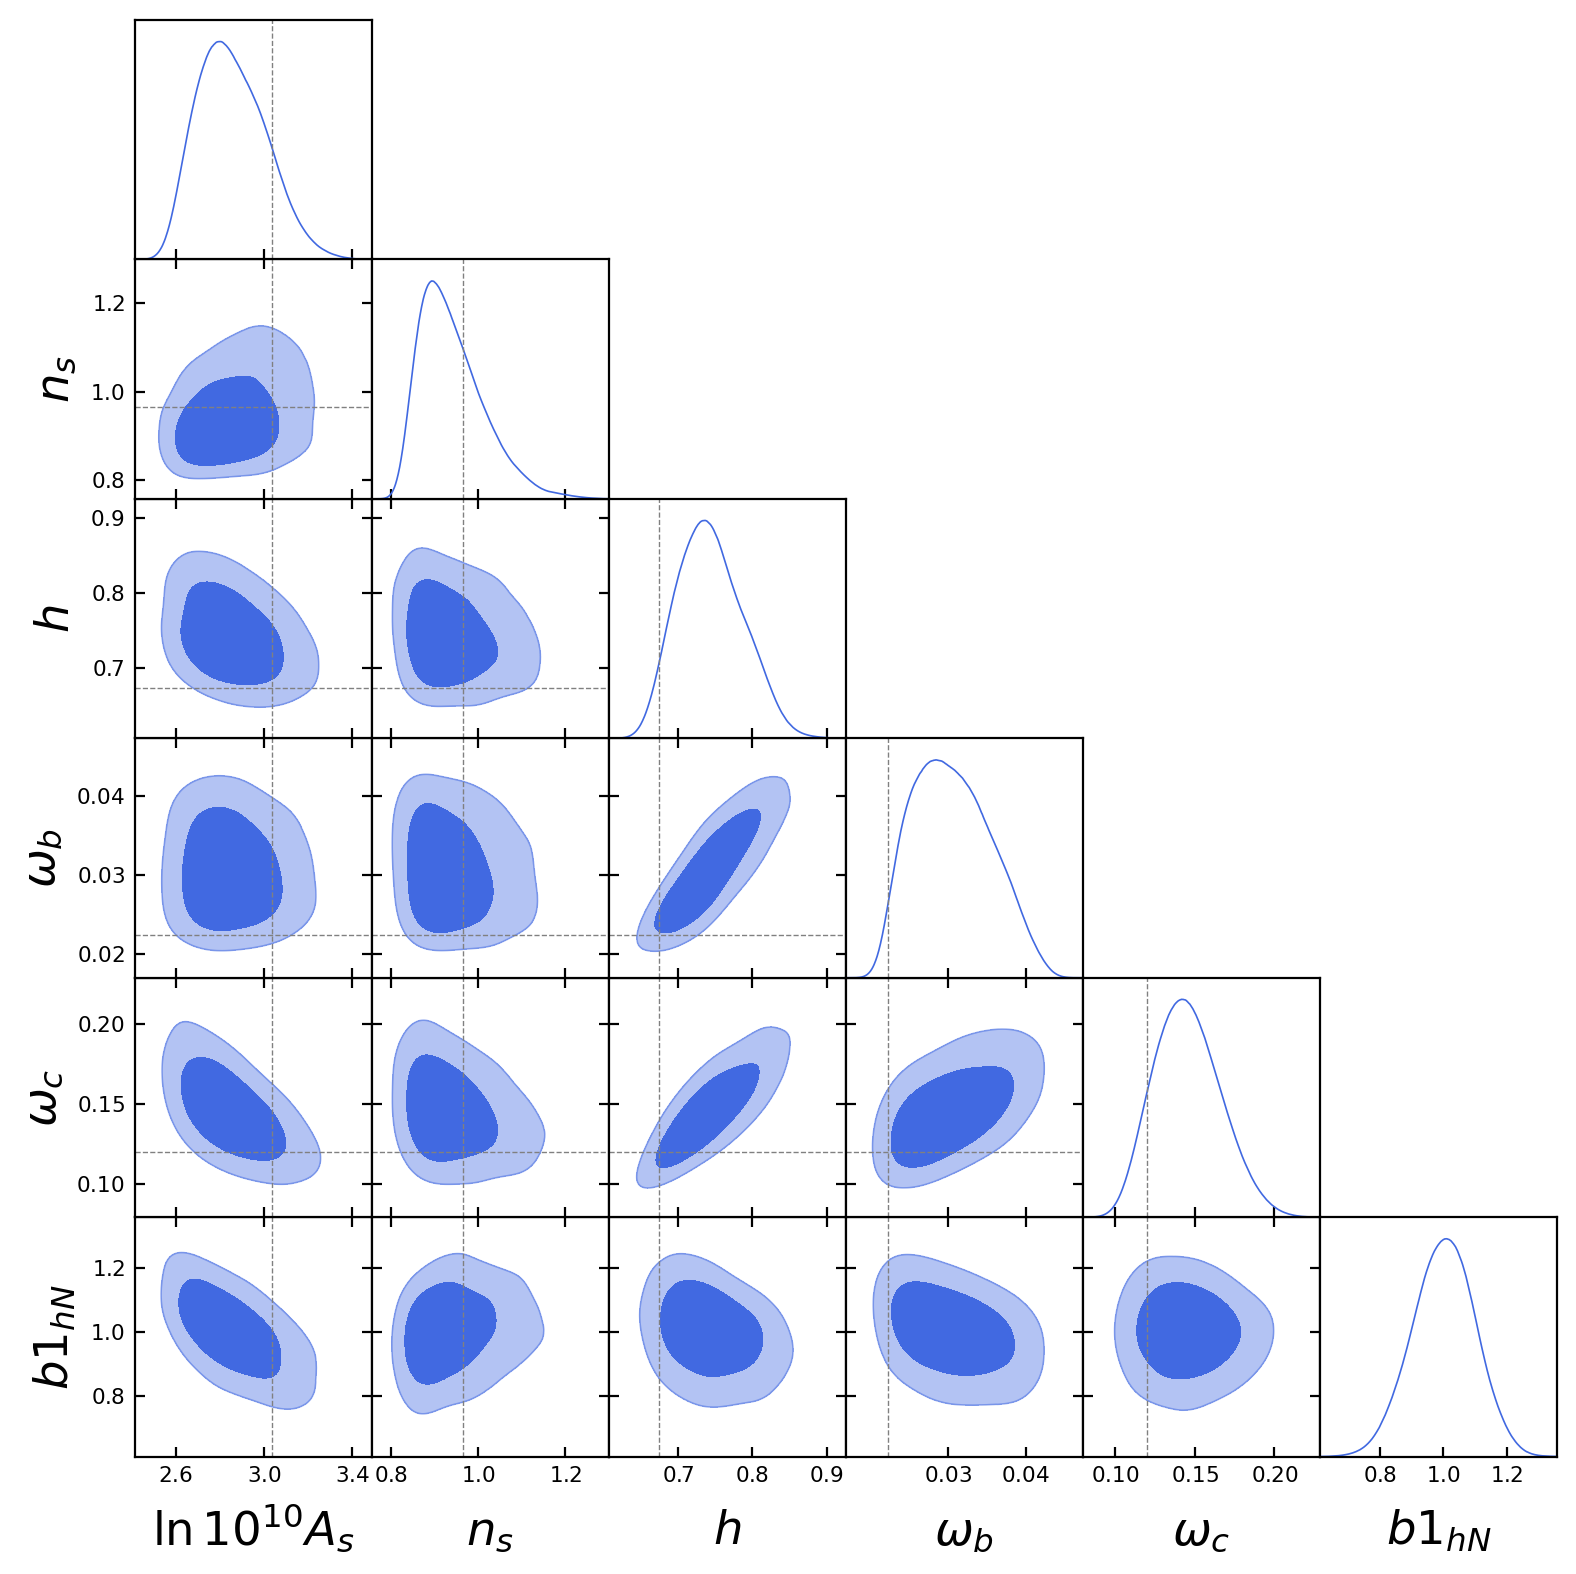

In [49]:
plots.get_subplot_plotter(width_inch=8, )
g.settings.scaling_factor = 1.5
g.settings.title_limit_fontsize = 12
g.settings.axes_labelsize = 20
g.settings.legend_fontsize = 28
g.triangle_plot([samples_std], ["ln10As", "ns", "h", "wb", "wc",   "b1"], filled=[True,True], 
                lws=[1,1.5],
                contour_colors=['royalblue','tomato'],
                legend_loc='upper right', 
                # title_limit=1,
                linewidth=4, markers={'ln10As':3.03639,'ns':0.9649,'h':0.6736,'wb':0.02237,'wc':0.12,'b1':2,'b2':1})
plt.savefig("contour_comparison_EFT-HOD.pdf")
plt.savefig("contour_comparison_EFT-HOD.png")